<a href="https://colab.research.google.com/github/haki-user/Data_Science/blob/Titanic_dataset_pca/Aditya10_titanic_analysis_cpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
#connect gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [51]:
#import data into colab
test = pd.read_csv('/content/gdrive/My Drive/test.csv')
train = pd.read_csv('/content/gdrive/My Drive/train.csv')
#upload locally:-
# from google.colab import files
# uploaded = files.upload()
#pd.read_csv("sample.csv")

In [52]:
#fill null values with mode
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)
for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

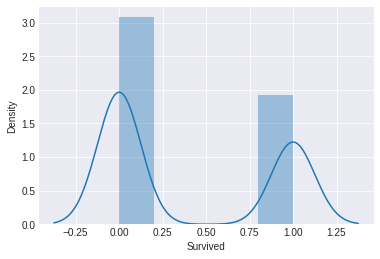

In [53]:
#graphical representation
sns.distplot(train.Survived)

In [54]:
#process data
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

train.Sex = enc.fit_transform(train.Sex.values.reshape(-1,1))
train.Age=train.Age.astype(int)
train.Age = enc.fit_transform(train.Age.values.reshape(-1,1))
train.Ticket = enc.fit_transform(train.Ticket.values.reshape(-1,1))
train.Cabin = enc.fit_transform(train.Cabin.values.reshape(-1,1))
train.Fare=train.Fare.astype(int)
train.Fare = enc.fit_transform(train.Fare.values.reshape(-1,1))
train.Embarked = enc.fit_transform(train.Embarked.values.reshape(-1,1))

test.Age = enc.fit_transform(test.Age.values.reshape(-1,1))
test.Ticket = enc.fit_transform(test.Ticket.values.reshape(-1,1))
test.Cabin = enc.fit_transform(test.Cabin.values.reshape(-1,1))
test.Fare=test.Fare.astype(int)
test.Fare = enc.fit_transform(test.Fare.values.reshape(-1,1))
test.Embarked = enc.fit_transform(test.Embarked.values.reshape(-1,1))


In [55]:
#setup X, y and X_test values
y = train.Survived
X = train.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
X.shape, y.shape,X_test.shape

((891, 7), (891,), (418, 7))

In [56]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((801, 7), (90, 7), (801,), (90,), (418, 7))

In [58]:
#scalar
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

In [62]:
#class weights
from sklearn.utils import compute_class_weight
# class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))) 
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                  
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.8107287449392713, 1: 1.3045602605863191}

In [63]:
#apply pca
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)